In [39]:
from __future__ import division
import numpy as np
import pandas as pd
import os

#from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingRegressor as gbReg
from sklearn.ensemble import RandomForestRegressor as rfReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import hvplot.pandas

In [40]:
#Read in the file with pandas
fileInName="8536110_cm_raw_ver_merged_wl_Cleaned"
cmC=pd.read_pickle(fileInName)
fileInName="8536110_cm_raw_ver_merged_wl_Target"
cmT=pd.read_pickle(fileInName)
fileInName="8536110_cm_raw_ver_merged_wl_Features"
cmF=pd.read_pickle(fileInName)
cmC.head()

,time,primary,sigma,backup,verified,prediction
0,2007-01-01 00:00:00,0.459,0.006,0.446,0.459,0.385
1,2007-01-01 00:06:00,0.437,0.005,0.425,0.437,0.365
2,2007-01-01 00:12:00,0.400,0.006,0.388,0.400,0.344
3,2007-01-01 00:18:00,0.376,0.006,0.363,0.376,0.321
4,2007-01-01 00:24:00,0.354,0.006,0.342,0.354,0.297


In [41]:
cmV_good = cmC['verified'].loc[cmT['goodPts'] == 1]
cmV_bad = cmC['verified'].loc[cmT['goodPts'] == 0]
cmP_good = cmC['primary'].loc[cmT['goodPts'] == 1]
cmP_bad = cmC['primary'].loc[cmT['goodPts'] == 0]
cmI = cmC[['sigma','backup','prediction']]
cmI_good=cmI.loc[cmT['goodPts'] == 1]
cmI_bad=cmI.loc[cmT['goodPts'] == 0]

cmI.head()
print(np.shape(cmI_good[0:40000]))

(40000, 3)


In [42]:
# Train the model
xTrain=cmI_good[0:40000]
yTrain=cmP_good[0:40000]

classifier = 'Gradient Boost'
if classifier == 'Random Forest':
    clf = gbReg(max_depth = depth,n_estimators=500,random_state=100)
if classifier == 'Gradient Boost': 
    clf = rfReg(n_estimators=1000)
clf.fit(xTrain,yTrain)
yMLTest = clf.predict(xTest)

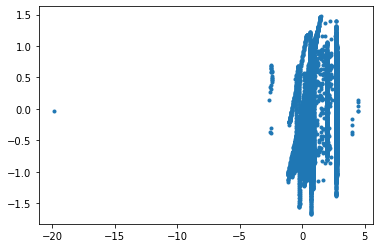

In [43]:
# How the relationshipe between verified and primary for bad points
plt.plot(cmP_bad,cmV_bad,'.')
cmP_bad.to_pickle("cm_Fig02_Primary_bad")
cmV_bad.to_pickle("cm_Fig02_Verified_bad")


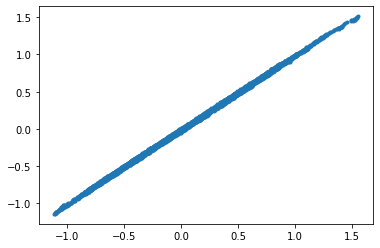

In [44]:
# Verify if other chunk of good points can be predicted by the model
xTest=cmI_good[50000:55000]
yTest=cmV_good[50000:55000]

yMLTest = clf.predict(xTest)
plt.plot(yMLTest,yTest,'.')

cmP_bad.to_pickle("cm_Fig01_GradientBoostModel_good")
cmV_bad.to_pickle("cm_Fig01_Verified_good")

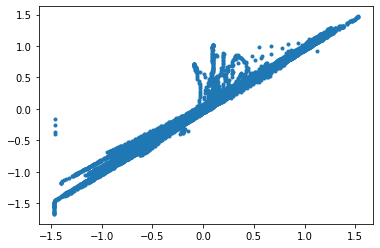

In [45]:
# Verify if prediction for bad points can match verified
xTest=cmI_bad
yTest=cmV_bad

yMLTest = clf.predict(xTest)
plt.plot(yMLTest,yTest,'.')
cmP_bad.to_pickle("cm_Fig03_GradientBoostModel_bad")
cmV_bad.to_pickle("cm_Fig03_Verified_bad")

In [46]:
mean_squared_error(yMLTest,yTest)

0.003926380215342115

In [47]:
# Train the model
xTrain=cmI_good[0:40000]
yTrain=cmP_good[0:40000]

classifier = 'Random Forest'
if classifier == 'Random Forest':
    depth = 3
    clf = gbReg(max_depth = depth,n_estimators=500,random_state=100)
if classifier == 'Gradient Boost': 
    clf = rfReg(n_estimators=1000)
clf.fit(xTrain,yTrain)
yMLTest = clf.predict(xTest)

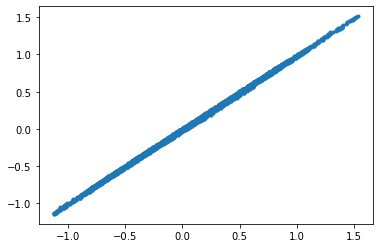

In [48]:
# Verify if other chunk of good points can be predicted by the model
xTest=cmI_good[50000:55000]
yTest=cmV_good[50000:55000]

yMLTest = clf.predict(xTest)
plt.plot(yMLTest,yTest,'.')
cmP_bad.to_pickle("cm_Fig04_RandomForestModel_good")
cmV_bad.to_pickle("cm_Fig04_Verified_good")


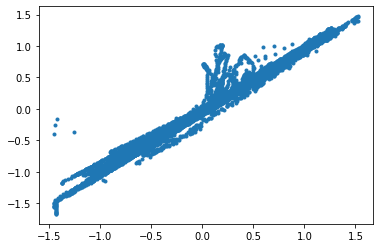

In [49]:
# Verify if prediction for bad points can match verified
xTest=cmI_bad
yTest=cmV_bad

yMLTest = clf.predict(xTest)
plt.plot(yMLTest,yTest,'.')
cmP_bad.to_pickle("cm_Fig05_RandomForestModel_bad")
cmV_bad.to_pickle("cm_Fig05_Verified_bad")

In [50]:
mean_squared_error(yMLTest,yTest)

0.0047182212435301005